<a href="https://colab.research.google.com/github/sharclark/Project1_Dojo/blob/main/Ecom_Shipping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Shar Clark

Date: 3/14/23

Title: Ecom Shipping Analysis

Description: Predicting on time shipping within ecommerce

# Data Cleaning

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Train.csv')
df.head()
# source: https://www.kaggle.com/code/santhoshtsk/ecommerce-shipping-eda-prediction

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
df.shape

print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 10999 rows, and 12 columns.
The rows represent 10999 observations, and the columns represent 11 features and 1 target variable.


In [5]:
df.describe()
# there are no outliers in this data set that need to be dealt with

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
print(f'There are {df.duplicated().sum()} missing values in this data set')

There are 0 missing values in this data set


In [7]:
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [8]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [9]:
df.nunique()
# drop ID since they are all unique values; rest of columns are needed

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [10]:
del df['ID']
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [11]:
df.info()
#all types look correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [15]:
data_types = df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

In [16]:
for col in str_cols:
    print(f'- {col}:')
    print(df[col].value_counts(dropna=False))
    print("\n\n")

# all object columns have no categorical inconsistencies to fix

- Warehouse_block:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64



- Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64



- Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64



- Gender:
F    5545
M    5454
Name: Gender, dtype: int64





#Univariate Visuals - For the target and all features

In [20]:
df.columns
#target = reached on time

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## Warehouse Block

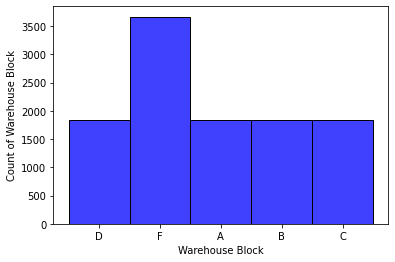

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

In [33]:
ax = sns.histplot(x = 'Warehouse_block', 
              data = df, 
              color = 'blue')
ax.set(xlabel='Warehouse Block', ylabel='Count of Warehouse Block')
plt.show()
df['Warehouse_block'].value_counts()


The F block has the highest amount of shipments in the data set. 

## Mode of Shipment

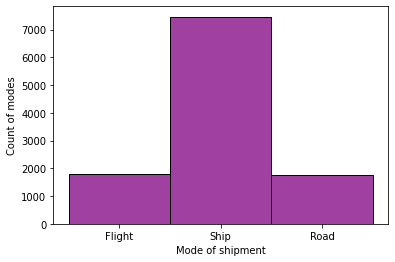

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [34]:
ax = sns.histplot(x = 'Mode_of_Shipment', 
              data = df, 
              color = 'purple')
ax.set(xlabel='Mode of shipment', ylabel='Count of modes')
plt.show()
df['Mode_of_Shipment'].value_counts()

The most common mode of transportation for this data set is via Ship. 

##Product Importance

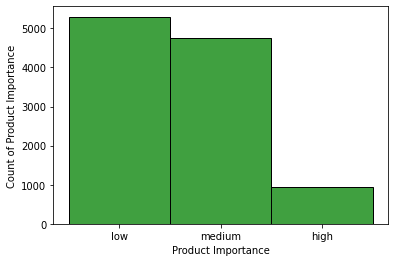

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [35]:
ax = sns.histplot(x = 'Product_importance', 
              data = df, 
              color = 'green')
ax.set(xlabel='Product Importance', ylabel='Count of Product Importance')
plt.show()
df['Product_importance'].value_counts()

The most common product importance is low importance. Most of the data points(shipments) in this data set are of low and medium importance. Shipments marked high importance are the lowest quantity in the data set. 

## Gender

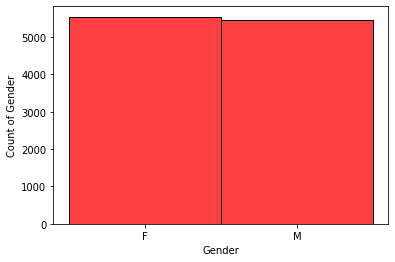

F    5545
M    5454
Name: Gender, dtype: int64

In [38]:
ax = sns.histplot(x = 'Gender', 
              data = df, 
              color = 'red')
ax.set(xlabel='Gender', ylabel='Count of Gender')
plt.show()
df['Gender'].value_counts()

There is a very even split of male and female for this data set. 

## Customer Care Calls

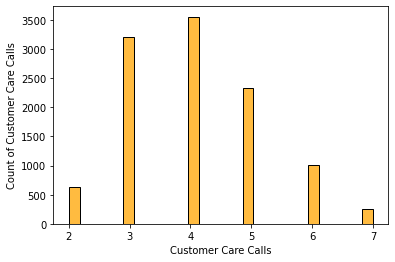

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

In [41]:
ax = sns.histplot(x = 'Customer_care_calls', 
              data = df, 
              color = 'orange')
ax.set(xlabel='Customer Care Calls', ylabel='Count of Customer Care Calls')
plt.show()
df['Customer_care_calls'].value_counts()

The most common count of customer care calls is 4. There are 3557 entries/shipments that have 4 customer care calls. The lowest grouped amount of times customer care was called was 7, where there were only 246 entries. 

## Customer Rating

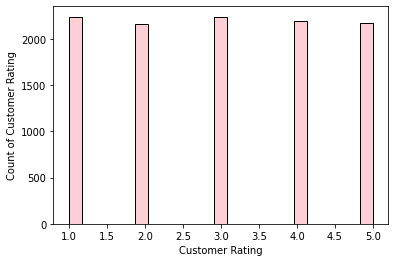

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

In [42]:
ax = sns.histplot(x = 'Customer_rating', 
              data = df, 
              color = 'pink')
ax.set(xlabel='Customer Rating', ylabel='Count of Customer Rating')
plt.show()
df['Customer_rating'].value_counts()

There is a very even distribution of customer ratings across this data set. There is no one rating that stands out on its own. 

## Cost of Product

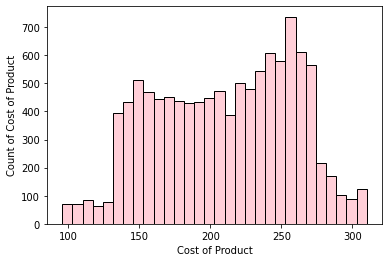

122      4
107      5
96       5
120      5
99       5
303      6
299      6
119      6
288      6
97       7
297      7
103      7
115      7
302      8
112      8
114      8
110      8
118      8
124      9
100      9
128      9
106      9
116      9
108      9
105      9
125     10
126     10
300     11
102     11
131     11
101     12
295     12
127     12
130     12
117     12
294     13
129     13
109     13
123     13
298     13
293     13
307     14
98      14
292     15
290     15
309     15
277     16
104     16
291     17
310     17
121     17
304     17
306     18
113     18
305     18
289     19
308     20
283     20
301     21
296     21
284     21
111     21
281     23
287     25
280     25
276     26
278     27
285     28
279     31
282     32
132     38
286     38
138     42
215     43
200     47
136     48
147     50
230     50
188     51
207     51
213     53
214     53
194     53
146     53
193     55
210     55
159     55
203     55
141     55
166     55
190     56

In [48]:
ax = sns.histplot(x = 'Cost_of_the_Product', 
              data = df, 
              color = 'pink')
ax.set(xlabel='Cost of Product', ylabel='Count of Cost of Product')
plt.show()
df['Cost_of_the_Product'].value_counts().sort_values()

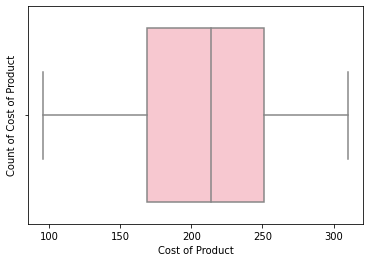

In [49]:
ax = sns.boxplot(x = 'Cost_of_the_Product', 
              data = df, 
              color = 'pink')
ax.set(xlabel='Cost of Product', ylabel='Count of Cost of Product')
plt.show()


The most common cost of product is 245. There are 110 shipments that the product cost 245. The boxplot shows that the bulk of the data have the cost of the product between around 175 and 250. This also shows that there are not any huge outliers in this data set. 

## Prior Purchases

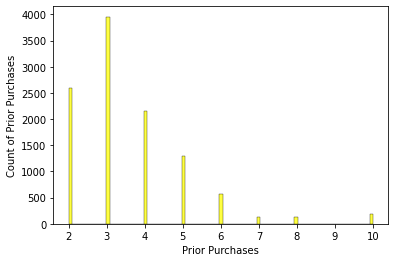

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

In [53]:
ax = sns.histplot(x = 'Prior_purchases', 
              data = df, 
              color = 'yellow')
ax.set(xlabel='Prior Purchases', ylabel='Count of Prior Purchases')
plt.show()
df['Prior_purchases'].value_counts()

The most common about of prior purchases is 3. This means that most of the shipments are shipments that the customer/client have purchased in the past. 

##Discount Offered

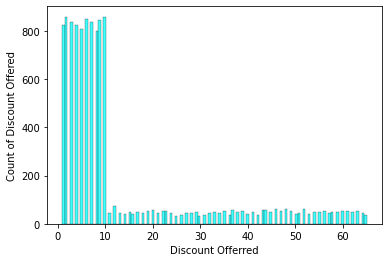

30     34
25     34
42     35
26     36
65     36
36     38
31     38
50     40
16     40
40     40
14     41
53     42
24     43
34     43
64     43
57     44
13     44
28     44
18     45
51     45
27     46
32     46
11     46
21     46
45     47
41     47
17     48
55     48
38     49
62     49
15     49
54     50
59     50
29     51
58     51
33     51
22     52
47     52
49     52
19     53
39     53
61     53
60     53
63     53
35     54
56     54
23     55
44     56
43     56
37     58
20     58
46     61
48     61
52     62
12     72
8     801
5     810
1     824
4     825
7     840
3     840
9     845
6     849
2     858
10    860
Name: Discount_offered, dtype: int64

In [55]:
ax = sns.histplot(x = 'Discount_offered', 
              data = df, 
              color = 'cyan')
ax.set(xlabel='Discount Offerred', ylabel='Count of Discount Offered')
plt.show()
df['Discount_offered'].value_counts().sort_values()

The most common discount offered was 10%. From 0-10% was the most common amount of discount offered. After a 10% discount the counts for other discounts are very similar, all in the range of 0-72; while the 10% discount range totals in the 800's. 

##Weight in Grams

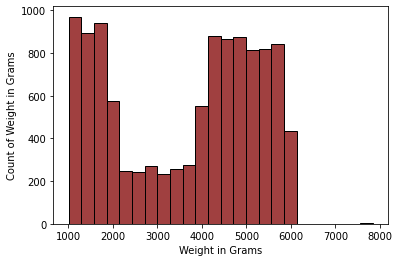

In [62]:
ax = sns.histplot(x = 'Weight_in_gms', 
              data = df, 
              color = 'maroon')
ax.set(xlabel='Weight in Grams', ylabel='Count of Weight in Grams')
plt.show()



There are two distinct groupings of weight in grams of the shipments. Between 4k grams and 6k grams and then another group of smallers shipments, around 1k to 2k. 

## Reached.on.Time_Y.N

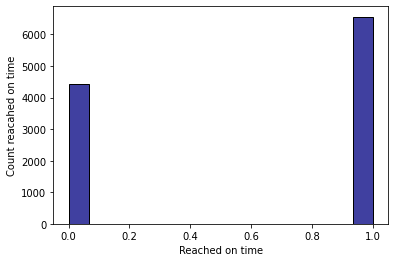

0    4436
1    6563
Name: Reached.on.Time_Y.N, dtype: int64

In [64]:
ax = sns.histplot(x = 'Reached.on.Time_Y.N', 
              data = df, 
              color = 'navy')
ax.set(xlabel='Reached on time', ylabel='Count reacahed on time')
plt.show()
df['Reached.on.Time_Y.N'].value_counts().sort_values()

More often than not, the shipments reached their destination on time. However, 40% of the time they did not reach their destination on time. 